In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime
from datetime import date, timedelta

import pickle

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 100)
from IPython.display import display, HTML

import sklearn
from sklearn.utils import shuffle
from sklearn import linear_model, preprocessing
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import Normalizer
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import math
from math import pi




In [3]:
with open('processed_data.pkl','rb') as f:
    data = pickle.load(f)
with open('predictors_processed.pkl','rb') as f1:
    data2 = pickle.load(f1)

In [4]:
data2.head()
data2 = data2.drop(['Joined'],axis=1, inplace=False)

In [5]:
data.head()

ID               Name  Age Nationality  Overall  Potential  \
0   0           L. Messi   31   Argentina       94         94   
1   1  Cristiano Ronaldo   33    Portugal       94         94   
2   2          Neymar Jr   26      Brazil       92         93   
3   3             De Gea   27       Spain       91         93   
4   4       K. De Bruyne   27     Belgium       91         92   

                  Club        Value      Wage  Special  Preferred Foot  \
0         FC Barcelona  110500000.0  565000.0     2202               0   
1             Juventus   77000000.0  405000.0     2228               1   
2  Paris Saint-Germain  118500000.0  290000.0     2143               1   
3    Manchester United   72000000.0  260000.0     1471               1   
4      Manchester City  102000000.0  355000.0     2281               1   

   International Reputation  Weak Foot  Skill Moves Body Type  Real Face  \
0                       5.0        4.0          4.0      Lean          1   
1                       5.0        4.0          5.0    Normal          1   
2                       5.0        5.0          5.0      Lean          1   
3                       4.0        3.0          1.0      Lean          1   
4                       4.0        5.0          4.0    Normal          1   

  Position  Jersey Number  Joined  Loaned From  Contract Valid Until  Height  \
0       RF           10.0    5297            0                     3     170   
1       ST            7.0     175            0                     4     188   
2       LW           10.0     516            0                     4     175   
3       GK            1.0    2741            0                     2     193   
4      RCM            7.0    1220            0                     5     180   

   Weight  LS  ST  RS  LW  LF  CF  RF  RW  LAM  CAM  RAM  LM  LCM  CM  RCM  \
0     159  88  88  88  92  93  93  93  92   93   93   93  91   84  84   84   
1     183  91  91  91  89  90  90  90  89   88   88   88  88   81  81   81   
2     150  84  84  84  89  89  89  89  89   89   89   89  88   81  81   81   
3     168   0   0   0   0   0   0   0   0    0    0    0   0    0   0    0   
4     154  82  82  82  87  87  87  87  87   88   88   88  88   87  87   87   

   RM  LWB  LDM  CDM  RDM  RWB  LB  LCB  CB  RCB  RB  Crossing  Finishing  \
0  91   64   61   61   61   64  59   47  47   47  59      84.0       95.0   
1  88   65   61   61   61   65  61   53  53   53  61      84.0       94.0   
2  88   65   60   60   60   65  60   47  47   47  60      79.0       87.0   
3   0    0    0    0    0    0   0    0   0    0   0      17.0       13.0   
4  88   77   77   77   77   77  73   66  66   66  73      93.0       82.0   

   HeadingAccuracy  ShortPassing  Volleys  Dribbling  Curve  FKAccuracy  \
0             70.0          90.0     86.0       97.0   93.0        94.0   
1             89.0          81.0     87.0       88.0   81.0        76.0   
2             62.0          84.0     84.0       96.0   88.0        87.0   
3             21.0          50.0     13.0       18.0   21.0        19.0   
4             55.0          92.0     82.0       86.0   85.0        83.0   

   LongPassing  BallControl  Acceleration  SprintSpeed  Agility  Reactions  \
0         87.0         96.0          91.0         86.0     91.0       95.0   
1         77.0         94.0          89.0         91.0     87.0       96.0   
2         78.0         95.0          94.0         90.0     96.0       94.0   
3         51.0         42.0          57.0         58.0     60.0       90.0   
4         91.0         91.0          78.0         76.0     79.0       91.0   

   Balance  ShotPower  Jumping  Stamina  Strength  LongShots  Aggression  \
0     95.0       85.0     68.0     72.0      59.0       94.0        48.0   
1     70.0       95.0     95.0     88.0      79.0       93.0        63.0   
2     84.0       80.0     61.0     81.0      49.0       82.0        56.0   
3     43.0       31.0     67.0     43.0      64.0       12.0        38.0 

In [6]:
data2.head()

Age  Overall  Potential  Special  Preferred Foot  International Reputation  \
0   31       94         94     2202               0                       5.0   
1   33       94         94     2228               1                       5.0   
2   26       92         93     2143               1                       5.0   
3   27       91         93     1471               1                       4.0   
4   27       91         92     2281               1                       4.0   

   Weak Foot  Skill Moves  Real Face  Jersey Number  Loaned From  \
0        4.0          4.0          1           10.0            0   
1        4.0          5.0          1            7.0            0   
2        5.0          5.0          1           10.0            0   
3        3.0          1.0          1            1.0            0   
4        5.0          4.0          1            7.0            0   

   Contract Valid Until  Height  Weight  LS  ST  RS  LW  LF  CF  RF  RW  LAM  \
0                     3     170     159  88  88  88  92  93  93  93  92   93   
1                     4     188     183  91  91  91  89  90  90  90  89   88   
2                     4     175     150  84  84  84  89  89  89  89  89   89   
3                     2     193     168   0   0   0   0   0   0   0   0    0   
4                     5     180     154  82  82  82  87  87  87  87  87   88   

   CAM  RAM  LM  LCM  CM  RCM  RM  LWB  LDM  CDM  RDM  RWB  LB  LCB  CB  RCB  \
0   93   93  91   84  84   84  91   64   61   61   61   64  59   47  47   47   
1   88   88  88   81  81   81  88   65   61   61   61   65  61   53  53   53   
2   89   89  88   81  81   81  88   65   60   60   60   65  60   47  47   47   
3    0    0   0    0   0    0   0    0    0    0    0    0   0    0   0    0   
4   88   88  88   87  87   87  88   77   77   77   77   77  73   66  66   66   

   RB  Crossing  Finishing  HeadingAccuracy  ShortPassing  Volleys  Dribbling  \
0  59      84.0       95.0             70.0          90.0     86.0       97.0   
1  61      84.0       94.0             89.0          81.0     87.0       88.0   
2  60      79.0       87.0             62.0          84.0     84.0       96.0   
3   0      17.0       13.0             21.0          50.0     13.0       18.0   
4  73      93.0       82.0             55.0          92.0     82.0       86.0   

   Curve  FKAccuracy  LongPassing  BallControl  Acceleration  SprintSpeed  \
0   93.0        94.0         87.0         96.0          91.0         86.0   
1   81.0        76.0         77.0         94.0          89.0         91.0   
2   88.0        87.0         78.0         95.0          94.0         90.0   
3   21.0        19.0         51.0         42.0          57.0         58.0   
4   85.0        83.0         91.0         91.0          78.0         76.0   

   Agility  Reactions  Balance  ShotPower  Jumping  Stamina  Strength  \
0     91.0       95.0     95.0       85.0     68.0     72.0      59.0   
1     87.0       96.0     70.0       95.0     95.0     88.0      79.0   
2     96.0       94.0     84.0       80.0     61.0     81.0      49.0   
3     60.0       90.0     43.0       31.0     67.0     43.0      64.0   
4     79.0       91.0     77.0       91.0     63.0     90.0      75.0   

   LongShots  Aggression  Interceptions  Positioning  Vision  Penalties  \
0       94.0        48.0           22.0         94.0    94.0       75.0   
1       93.0        63.0           29.0         95.0    82.0       85.0   
2       82.0        56.0           36.0         89.0    87.0       81.0   
3       12.0        38.0           30.0         12.0    68.0       40.0   
4       91.0        76.0           61.0         87.0    94.0       79.0   

   Composure  Marking  StandingTackle  SlidingTackle  GKDiving  GKHandling  \
0       96.0     33.0            28.0           26.0       6.0        11.0   
1       95.0     28.0            31.0           23.0       7.0        11.0   
2       94.0     27.0            24.0           33.0       9.0         

In [7]:
data = data.set_index(['ID'])

In [8]:
#Seperate the continuous/numeric columns from the indicator/dummy/ordinal columns

numeric_cols=['Age', 'Overall','Potential','Special','International Reputation', 'Weak Foot', 'Skill Moves',
               'Height', 'Weight','LS','ST','RS',  'LW',  'LF',  'CF',  'RF',  'RW',  'LAM',  'CAM',  'RAM', 
               'LM',  'LCM',  'CM',  'RCM',  'RM',  'LWB',  'LDM',  'CDM',  'RDM',  'RWB',  'LB',  'LCB',  'CB',
               'RCB',  'RB',  'Crossing',  'Finishing',  'HeadingAccuracy',  'ShortPassing',  'Volleys', 
               'Dribbling',  'Curve',  'FKAccuracy',  'LongPassing',  'BallControl',  'Acceleration',  
               'SprintSpeed',  'Agility',  'Reactions',  'Balance',  'ShotPower',  'Jumping',  'Stamina',  
               'Strength',  'LongShots',  'Aggression',  'Interceptions',  'Positioning',  'Vision',  
               'Penalties',  'Composure',  'Marking',  'StandingTackle',  'SlidingTackle',  'GKDiving',  
               'GKHandling',  'GKKicking',  'GKPositioning',  'GKReflexes',  'Club_Reputation',  
               'Position_Potential',  'Attacking',  'Skill',  'Movement',  'Power',  'Mentality',  
               'Defending',  'GoalKeeping',  'Potential_Difference',  'Attack_WR',  'Defense_WR']

non_numeric_cols=['Position_CAM',  'Position_CB',  'Position_CDM',  'Position_CF',  'Position_CM',  
                   'Position_GK',  'Position_LAM',  'Position_LB',  'Position_LCB',  'Position_LCM',  
                   'Position_LDM',  'Position_LF',  'Position_LM',  'Position_LS',  'Position_LW',  
                   'Position_LWB',  'Position_RAM',  'Position_RB',  'Position_RCB',  'Position_RCM',  
                   'Position_RDM',  'Position_RF',  'Position_RM',  'Position_RS',  'Position_RW',  
                   'Position_RWB',  'Position_ST',  'Continent_Africa',  'Continent_Asia',  'Continent_Europe',
                   'Continent_North America',  'Continent_Oceania',  'Continent_South America',  
                   'Position_Group_Defender',  'Position_Group_Forward',  'Position_Group_GoalKeeper', 
                   'Position_Group_Midfielder', 'Preferred Foot','Real Face','Body Type']
            

In [9]:
#normalising variables
normaliser = Normalizer().fit(data2[numeric_cols])
df_normaliser = normaliser.transform(data2[numeric_cols])
df_normaliser = pd.DataFrame(df_normaliser, columns = numeric_cols)
#joining normalised variables with non_numeric cols
datanorm = pd.concat([df_normaliser, data2[non_numeric_cols]], axis=1)

In [10]:
datanorm.head()

Age   Overall  Potential   Special  International Reputation  \
0  0.013452  0.040790   0.040790  0.955537                  0.002170   
1  0.014151  0.040309   0.040309  0.955399                  0.002144   
2  0.011595  0.041030   0.041475  0.955720                  0.002230   
3  0.017581  0.059255   0.060557  0.957843                  0.002605   
4  0.011333  0.038195   0.038615  0.957400                  0.001679   

   Weak Foot  Skill Moves    Height    Weight        LS        ST        RS  \
0   0.001736     0.001736  0.073770  0.068997  0.038187  0.038187  0.038187   
1   0.001715     0.002144  0.080617  0.078473  0.039022  0.039022  0.039022   
2   0.002230     0.002230  0.078045  0.066896  0.037462  0.037462  0.037462   
3   0.001953     0.000651  0.125672  0.109393  0.000000  0.000000  0.000000   
4   0.002099     0.001679  0.075551  0.064638  0.034418  0.034418  0.034418   

         LW        LF        CF        RF        RW       LAM       CAM  \
0  0.039923  0.040356  0.040356  0.040356  0.039923  0.040356  0.040356   
1  0.038165  0.038593  0.038593  0.038593  0.038165  0.037736  0.037736   
2  0.039692  0.039692  0.039692  0.039692  0.039692  0.039692  0.039692   
3  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4  0.036516  0.036516  0.036516  0.036516  0.036516  0.036936  0.036936   

        RAM        LM       LCM        CM       RCM        RM       LWB  \
0  0.040356  0.039489  0.036451  0.036451  0.036451  0.039489  0.027772   
1  0.037736  0.037736  0.034734  0.034734  0.034734  0.037736  0.027873   
2  0.039692  0.039246  0.036124  0.036124  0.036124  0.039246  0.028988   
3  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4  0.036936  0.036936  0.036516  0.036516  0.036516  0.036936  0.032319   

        LDM       CDM       RDM       RWB        LB       LCB        CB  \
0  0.026470  0.026470  0.026470  0.027772  0.025602  0.020395  0.020395   
1  0.026158  0.026158  0.026158  0.027873  0.026158  0.022727  0.022727   
2  0.026758  0.026758  0.026758  0.028988  0.026758  0.020961  0.020961   
3  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4  0.032319  0.032319  0.032319  0.032319  0.030640  0.027702  0.027702   

        RCB        RB  Crossing  Finishing  HeadingAccuracy  ShortPassing  \
0  0.020395  0.025602  0.036451   0.041224         0.030376      0.039055   
1  0.022727  0.026158  0.036020   0.040309         0.038165      0.034734   
2  0.020961  0.026758  0.035232   0.038800         0.027650      0.037462   
3  0.000000  0.000000  0.011070   0.008465         0.013674      0.032558   
4  0.027702  0.030640  0.039035   0.034418         0.023085      0.038615   

    Volleys  Dribbling     Curve  FKAccuracy  LongPassing  BallControl  \
0  0.037319   0.042092  0.040356    0.040790     0.037753     0.041658   
1  0.037307   0.037736  0.034734    0.032590     0.033019     0.040309   
2  0.037462   0.042813  0.039246    0.038800     0.034786     0.042367   
3  0.008465   0.011721  0.013674    0.012372     0.033209     0.027348   
4  0.034418   0.036097  0.035677    0.034837     0.038195     0.038195   

   Acceleration  SprintSpeed   Agility  Reactions   Balance  ShotPower  \
0      0.039489     0.037319  0.039489   0.041224  0.041224   0.036885   
1      0.038165     0.039022  0.037307   0.041166  0.030017   0.040737   
2      0.041921     0.040138  0.042813   0.041921  0.037462   0.035678   
3      0.037116     0.037767  0.039069   0.058604  0.027999   0.020186   
4      0.032739     0.031899  0.033159   0.038195  0.032319   0.038195   

    Jumping   Stamina  Strength  LongShots  Aggression  Interceptions  \
0  0.029508  0.031244  0.025602   0.040790    0.020829       0.009547   
1  0.040737  0.037736  0.033876   0.039880    0.027015       0.012436   
2  0.027204  0.036124  0.021853   0.036570    0.024974       0.016055   
3  0.043627  0.027999  0.041674   0.007814    0.024744       0.019535   
4  0.026443  0.037776  0.0314

## Filtering system for overall rating and position


In [11]:
def filter_players(position, overall_min=0, overall_max=100):
    if str(position) == 'RF':
        indices = list(data[(data['Position'].isin(['RF','RS'])) & (data['Overall']<=overall_max) & 
                            (data['Overall']>=overall_min)].index.values)
    elif str(position) == 'LF':
        indices = list(data[(data['Position'].isin(['LF','LS'])) & (data['Overall']<=overall_max) &
                           (data['Overall']>=overall_min)].index.values)
    elif str(position) == 'LAM':
        indices = list(data[(data['Position'].isin(['LAM','CAM'])) & (data['Overall']<=overall_max) &
                            (data['Overall']>=overall_min)].index.values)
    elif str(position) == 'RAM':
        indices = list(data[(data['Position'].isin(['RAM','CAM'])) & (data['Overall']<=overall_max) &
                            (data['Overall']>=overall_min)].index.values)
    else:
        indices = list(data[(data['Position'] == position) & (data['Overall']<=overall_max) &
                           (data['Overall']>=overall_min)].index.values)
    #global filtered_df
    #global filtered_list
    #global filtered_names
    
    filtered_df = data.iloc[indices,:]
    #filtered_list = list(data.iloc[indices,:].index)
    #filtered_names = data.Name[data.index.isin(filtered_list)]
    
    return filtered_df


In [15]:
posit = input("Enter the position looking for: \n")
over_min = input("What is the min overall?: \n")
over_max = input("What is the max overall?: \n")

filtered_players = filter_players(str(posit), int(over_min), int(over_max))

print("Here are the filtered players based on your criteria:")
display(filtered_players)


#print("Here are the filtered players' features based on your criteriea: ")
#display(filtered_players[2])

#display(filtered_players[0])


Enter the position looking for: 
CAM
What is the min overall?: 
80
What is the max overall?: 
90
Here are the filtered players based on your criteria:


Name  Age  Nationality  Overall  Potential  \
ID                                                            
17       A. Griezmann   27       France       89         90   
31         C. Eriksen   26      Denmark       88         91   
61    Roberto Firmino   26       Brazil       86         87   
66          T. Müller   28      Germany       86         86   
74            M. Özil   29      Germany       86         86   
80           N. Fekir   24       France       85         89   
96           A. Vidal   31        Chile       85         85   
101     R. Nainggolan   30      Belgium       85         85   
144          D. Payet   31       France       84         84   
166  Anderson Talisca   24       Brazil       83         90   
208          Giuliano   28       Brazil       83         83   
254        J. Lingard   25      England       82         83   
263           Rafinha   25       Brazil       82         87   
282        J. Pastore   29    Argentina       82         82   
289         A. Ramsey   27        Wales       82         83   
292     G. Sigurðsson   28      Iceland       82         82   
295         N. Gaitán   30    Argentina       82         82   
302      G. Wijnaldum   27  Netherlands       82         82   
320    Laure Santeiro   30       Brazil       81         81   
325     Pablo Fornals   22        Spain       81         86   
337        João Mário   25     Portugal       81         84   
360         J. Iličić   30     Slovenia       81         81   
370        X. Shaqiri   26  Switzerland       81         81   
379         S. Kagawa   29        Japan       81         81   
380        M. Lanzini   25    Argentina       81         85   
402      Borja Valero   33        Spain       81         81   
413        K. Havertz   19      Germany       80         89   
418        M. Almirón   24     Paraguay       80         84   
421         Oyarzabal   21        Spain       80         87   
449     H. Çalhanoğlu   24       Turkey       80         84   
489         D. Didavi   28      Germany       80         80   
496         A. Ljajić   26       Serbia       80         81   
501           Muniain   25        Spain       80         83   
507      R. Boudebouz   28      Algeria       80         80   
525          V. Birsa   31     Slovenia       80         80   
530       Raúl García   31        Spain       80         80   

                               Club       Value      Wage  Special  \
ID                                                                   
17                  Atlético Madrid  78000000.0  145000.0     2246   
31                Tottenham Hotspur  73500000.0  205000.0     2117   
61                        Liverpool  53000000.0  195000.0     2187   
66                FC Bayern München  45000000.0  135000.0     2097   
74                          Arsenal  43500000.0  190000.0     1911   
80               Olympique Lyonnais  50000000.0   92000.0     2102   
96                     FC Barcelona  26000000.0  205000.0     2230   
101                           Inter  35500000.0  105000.0     2278   
144          Olympique de Marseille  27500000.0   75000.0     2053   
166  Guangzhou Evergrande Taobao FC  36500000.0   18000.0     2142   
208                        Al Nassr  26000000.0   64000.0     2073   
254               Manchester United  26500000.0  140000.0     2095   
263                    FC Barcelona  29500000.0  165000.0     2091   
282                            Roma  21500000.0   84000.0     2050   
289                         Arsenal  25000000.0  130000.0     2110   
292                         Everton  22500000.0  125000.0     2096   
295                Dalian YiFang FC  21000000.0   22000.0     2010   
302                       Liverpool  23000000.0  130000.0     2175   
320                      Fluminense  17000000.0   40000.0     1853   
325                   Villarreal CF  24000000.0   36000.0     2071   
337                           Inter  22500000.0   71000.0     2055   
360         

## Recommendation Engine

In [13]:
#creating a new dataframe with qualitative variables with normalised df
name_col = ['Name','Nationality','Club','Continent', 'Position_Group']
name_df = pd.DataFrame(data[name_col], columns=name_col)
name_df.index = datanorm.index
datanorm_name = pd.concat([name_df,datanorm], axis=1)

In [14]:
def rec_engine(players, no_of_similar_players):
    
    #filter player based on position
    player_name = players
    
    position = datanorm_name.loc[datanorm_name['Name'] == player_name, 'Position_Group'].values[0]
    df_filtered = datanorm_name.loc[datanorm_name['Position_Group'] == position, :]
    
    #selecting only quantitative variables
    num_cols = list(df_filtered.select_dtypes(include=['float', 'int']).columns)
    
    #finding the nearest k-neighbours
    k= no_of_similar_players + 1
    df_nearestneighbours = df_filtered.loc[:, num_cols]
    
    #get player index from filtered position
    filtered_pd = pd.DataFrame(df_filtered)
    filtered_pd = filtered_pd.reset_index()
    filtered_pd = filtered_pd.drop(['index'], axis=1) 
    #this part of the function might be unnecessary now, since I took the indices back from initial df
    ind = filtered_pd.loc[filtered_pd['Name'] == player_name].index.values[0]
    
    model = NearestNeighbors(n_neighbors=k).fit(df_nearestneighbours)
    indices = model.kneighbors(df_nearestneighbours, return_distance=False)
    
    #getting indices back from initial dataframe
    data_filtered = data.loc[data['Position_Group']==position,:]
    data_filtered.index = filtered_pd.index
    
  
    return data_filtered.loc[data_filtered.index.isin(indices[ind]),:]
#filtered_pd.loc[filtered_pd.index.isin(indices[ind]),:] 

In [16]:
#recommended players in ouput are only from its own position group
players= input("Name of player: \n")
no_of_similar_players = input("How many similar players: \n")


recommended_players = rec_engine(str(players), int(no_of_similar_players))
display(recommended_players)

Name of player: 
K. De Bruyne
How many similar players: 
5


Name  Age Nationality  Overall  Potential             Club  \
0      K. De Bruyne   27     Belgium       91         92  Manchester City   
30             Koke   26       Spain       85         86  Atlético Madrid   
39  Bruno Fernandes   23    Portugal       84         88      Sporting CP   
60         T. Lemar   22      France       83         89  Atlético Madrid   
66        H. Ziyech   25     Morocco       83         86             Ajax   
75            Pizzi   28    Portugal       83         83       SL Benfica   

          Value      Wage  Special  Preferred Foot  International Reputation  \
0   102000000.0  355000.0     2281               1                       4.0   
30   45000000.0   88000.0     2175               1                       3.0   
39   40500000.0   22000.0     2223               1                       2.0   
60   35500000.0   64000.0     2173               0                       3.0   
66   32500000.0   28000.0     2098               0                       3.0   
75   25500000.0   22000.0     2149               1                       3.0   

    Weak Foot  Skill Moves Body Type  Real Face Position  Jersey Number  \
0         5.0          4.0    Normal          1      RCM            7.0   
30        4.0          3.0    Normal          1       LM            8.0   
39        3.0          4.0      Lean          0      LCM            8.0   
60        2.0          4.0      Lean          1       LM            8.0   
66        2.0          4.0      Lean          1      RAM           22.0   
75        4.0          3.0      Lean          0      LCM           21.0   

    Joined  Loaned From  Contract Valid Until  Height  Weight  LS  ST  RS  LW  \
0     1220            0                     5     180     154  82  82  82  87   
30    2922            0                     1     175     163  77  77  77  81   
39     549            0                     5     178     152  77  77  77  81   
60     184            0                     5     170     137  76  76  76  82   
66     854            0                     3     180     143  73  73  73  80   
75    1981            0                     4     178     159  74  74  74  80   

    LF  CF  RF  RW  LAM  CAM  RAM  LM  LCM  CM  RCM  RM  LWB  LDM  CDM  RDM  \
0   87  87  87  87   88   88   88  88   87  87   87  88   77   77   77   77   
30  81  81  81  81   83   83   83  83   84  84   84  83   76   78   78   78   
39  81  81  81  81   82   82   82  82   82  82   82  82   75   75   75   75   
60  81  81  81  82   82   82   82  82   79  79   79  82   74   71   71   71   
66  79  79  79  80   81   81   81  81   82  82   82  81   71   72   72   72   
75  79  79  79  80   81   81   81  81   81  81   81  81   74   74   74   74   

    RWB  LB  LCB  CB  RCB  RB  Crossing  Finishing  HeadingAccuracy  \
0    77  73   66  66   66  73      93.0       82.0             55.0   
30   76  73   70  70   70  73      86.0       72.0             61.0   
39   75  73   67  67   67  73      84.0       73.0             58.0   
60   74  72   64  64   64  72      83.0       75.0             54.0   
66   71  67   60  60   60  67      84.0       68.0             53.0   
75   74  71   64  64   64  71      79.0       76.0             45.0   

    ShortPassing  Volleys  Dribbling  Curve  FKAccuracy  LongPassing  \
0           92.0     82.0       86.0   85.0        83.0         91.0   
30          90.0     56.0       82.0   85.0        76.0         89.0   
39          85.0     84.0       83.0   85.0        81.0         82.0   
60          84.0     78.0       85.0   85.0        81.0         75.0   
66          86.0     77.0       83.0   90.0        78.0         89.0   
75          83.0     77.0       80.0   83.0        76.0         84.0   

    BallControl  Acceleration  SprintSpeed  Agility  Reactions  Balance  \
0          91.0          78.0         76.0     79.0       91.0     77.0   
30         86.0          71.0         68.0     74.0       85.0     78.0   
39         85.0          79.0         

## Visualisations

In [17]:
import plotly.graph_objects as go

In [18]:
selected_variables = ['Age','Crossing','Finishing','HeadingAccuracy','ShortPassing','Volleys',
                 'Dribbling','Curve','FKAccuracy','LongPassing','BallControl',
                 'Acceleration','SprintSpeed','Agility','Reactions','Balance',
                 'ShotPower','Jumping','Stamina','Strength','LongShots',
                 'Aggression','Interceptions','Positioning','Vision','Penalties',
                 'Composure','Marking','StandingTackle','SlidingTackle',
                 'GKDiving','GKHandling','GKKicking','GKPositioning','GKReflexes']

In [19]:
fig = go.Figure()
k=[]
l=[]
for i in range(recommended_players.shape[0]):
    x= list(recommended_players.loc[recommended_players.index[i],selected_variables])
    k.append(x)
for i in range(recommended_players.shape[0]):
    l.append(recommended_players.loc[recommended_players.index[i],'Name'])
    
for i in range(len(k)):
    fig.add_trace(go.Scatterpolar(
    r=k[i],          
    theta= selected_variables,
    fill='toself',
    name= l[i],
    opacity=0.5
     
 ))
fig.show()    

# fig.add_trace(go.Scatterpolar(
#     r=[27,93.0,82.0,]            
#     theta= selected_variable,
#     fill=toitself
# ))
# fig = go.Figure()
# fig.add_trace(go.Scatterpolar(
#     r=[23,84.0,]            
#     theta= selected_variable,
#     fill=toitself
# ))




In [110]:
#Value binning based on 5 quantile groups
y_binned_quantile = pd.qcut(data.Value,5, labels=['0-20%','20-40%','40-60%','60-80%','80-100%'])

In [111]:
y_binned_quantile.head()

ID
0    80-100%
1    80-100%
2    80-100%
3    80-100%
4    80-100%
Name: Value, dtype: category
Categories (5, object): [0-20% < 20-40% < 40-60% < 60-80% < 80-100%]

In [120]:
#Create scaler
scl = StandardScaler()

#Scale the numeric columns
predictors_num = pd.DataFrame(scl.fit_transform(data2[numeric_cols]), columns=numeric_cols)

#Merge scaled numerics with the dummy/ordinal columns
datascaled = pd.concat([predictors_num,data2[non_numeric_cols]], axis=1)

In [126]:
from sklearn.manifold import TSNE

#scaled = StandardScaler()
#X = scaled.fit_transform(predictors_df)

Xtsne = TSNE(n_components=2).fit_transform(datascaled)
dftsne = pd.DataFrame(Xtsne)
dftsne['Value_Bin'] = y_binned_quantile
dftsne.columns = ['x1','x2','Value_Bin']

In [127]:
dftsne.head()

x1         x2 Value_Bin
0  64.652824 -14.396534   80-100%
1  64.880028 -13.792747   80-100%
2  64.602142 -14.410767   80-100%
3  23.518457 -75.847664   80-100%
4  63.024651 -11.646500   80-100%

Text(0.5, 1.0, 'TSNE Reduction Colored by Value Bin')

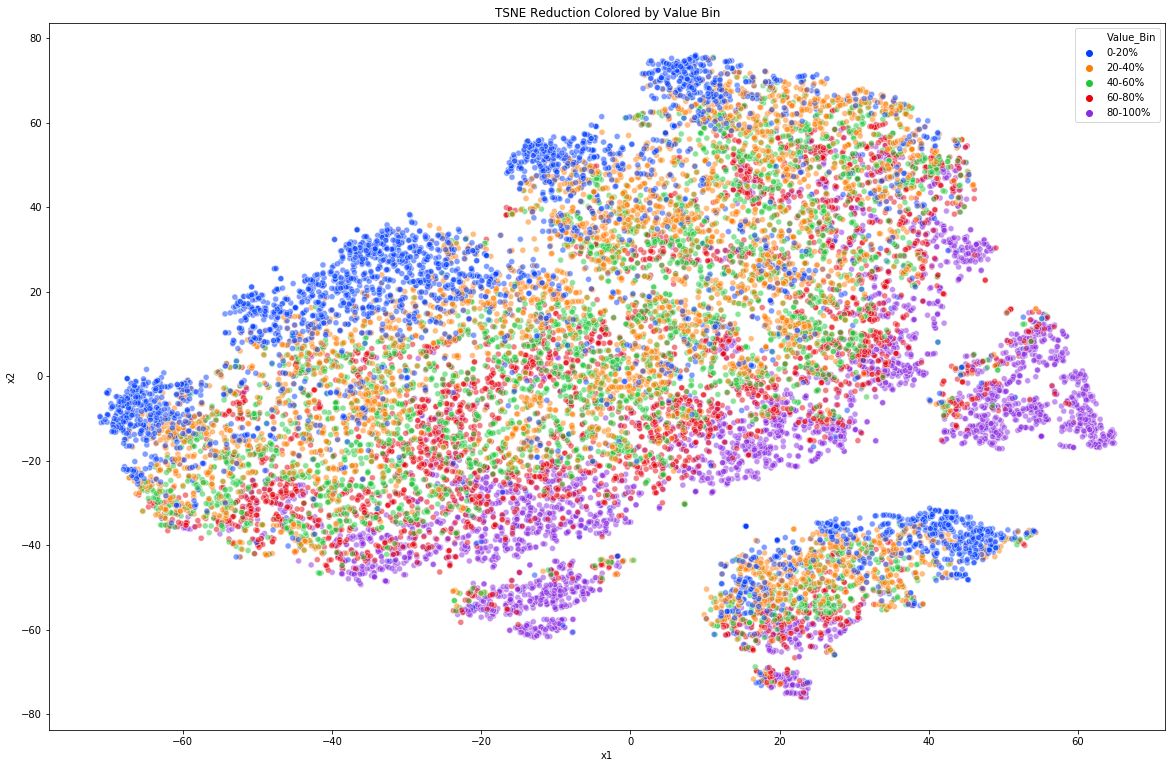

In [128]:
fig, ax = plt.subplots(figsize=(20,13))

cmap = sns.color_palette("bright", 5)
sns.scatterplot(data=dftsne,x='x1',y='x2',hue='Value_Bin',legend="full",alpha=0.5,palette=cmap ,ax=ax)
ax.set_title('TSNE Reduction Colored by Value Bin')

In [129]:
dftsne['Position_Group_Labels'] = data.Position_Group

Text(0.5, 1.0, 'TSNE Reduction Colored by Position Group')

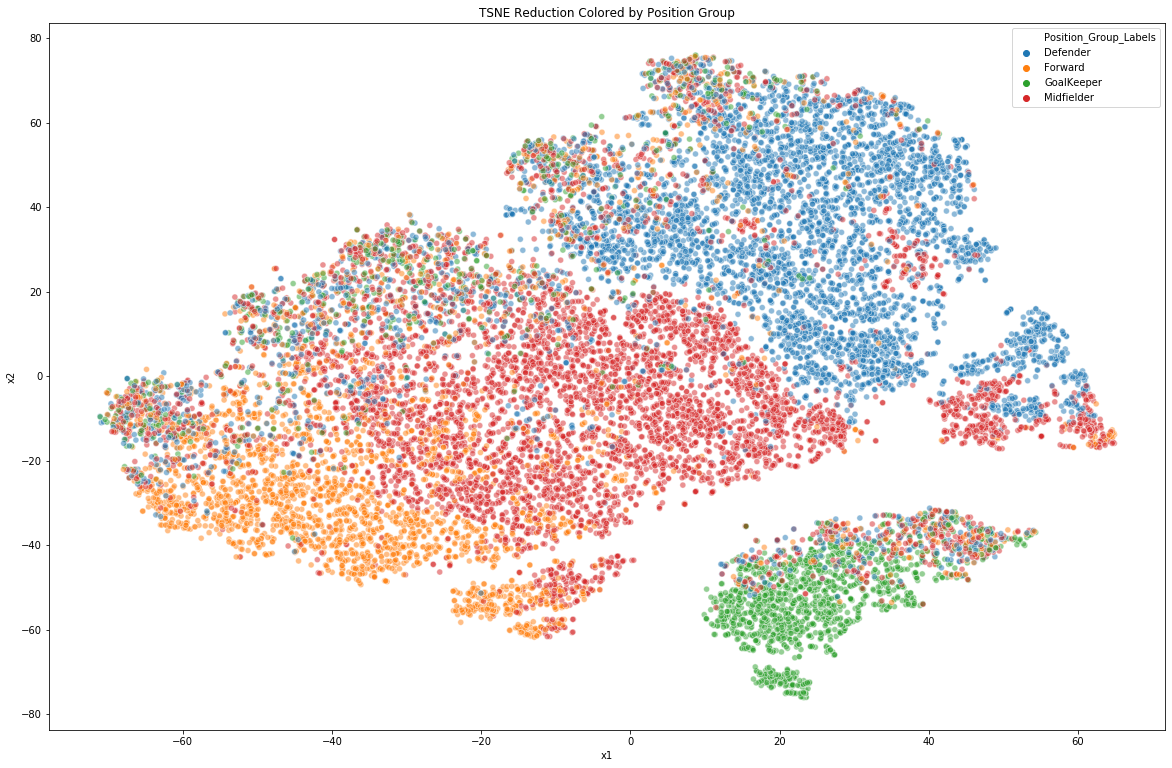

In [130]:
fig, ax = plt.subplots(figsize=(20,13))
sns.scatterplot(data=dftsne,x='x1',y='x2',hue='Position_Group_Labels',legend="full",alpha=0.5,ax=ax)
ax.set_title('TSNE Reduction Colored by Position Group')

In [21]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6)
clustering_ori = kmeans.fit_predict(data)

dftsne['K_mean_clusters'] = clustering_ori

fig, ax = plt.subplots(figsize=(20,13))

cmap = sns.color_palette("bright", 6 )
sns.scatterplot(data=dftsne,x='x1',y='x2',hue='K_mean_clusters',alpha=0.5 ,ax=ax, legend = 'full', palette=cmap)
ax.set_title('TSNE Reduction Colored by Value Continuous')

NameError: name 'predictors_scaled' is not defined